In [1]:
import sys
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from osgeo import gdal

# Imports Scikit-Learn (Vus au TD Classification)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedGroupKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score

# Ajout du chemin vers tes scripts personnels et ceux du prof
# Assure-toi que le dossier contenant libsigma est bien ici
sys.path.append('/home/onyxia/work/') 

from libsigma import read_and_write as rw
from libsigma import classification as cla
# Tu devras créer ce fichier pour tes fonctions perso comme demandé dans le projet
#import my_function as mf 

# Configuration des dossiers
data_dir = "data/"
results_dir = "results/"
fig_dir = os.path.join(results_dir, "figure/")

# Création des dossiers de sortie si inexistants (Bonne pratique TD)
os.makedirs(fig_dir, exist_ok=True)

print("Environnement chargé.")

Environnement chargé.


In [2]:
import sys
import os

# Ajoutez le chemin vers le DOSSIER contenant my_function.py
sys.path.append('/home/onyxia/work/projet_teledec/notebook/') 

# Maintenant Python va trouver le fichier dans ce dossier
import my_function as mf 


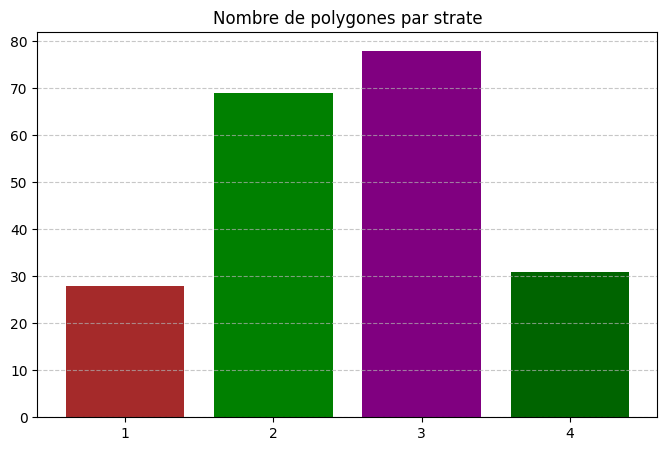

/opt/python/lib/python3.13/site-packages/osgeo/gdal.py:330: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


✅ Rasterisation terminée : /home/onyxia/work/data/projet_eval/sample_strata.tif


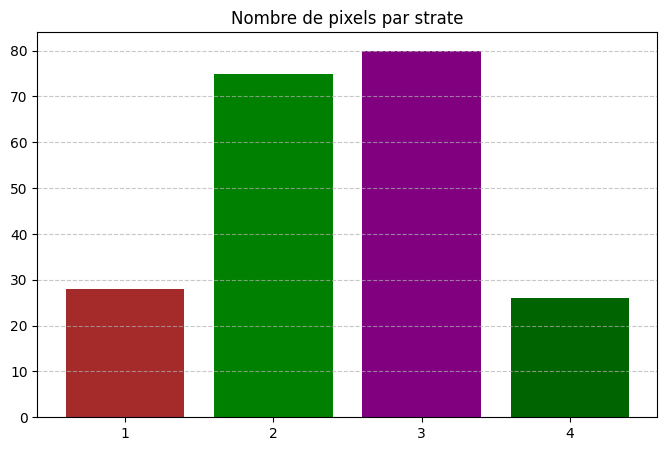

In [3]:
import sys
import os

# Ajoutez le chemin vers le DOSSIER contenant my_function.py
sys.path.append('/home/onyxia/work/projet_teledec/notebook/') 

# Maintenant Python va trouver le fichier dans ce dossier
import my_function as mf 

# --- Analyse des Polygones ---
# Assurez-vous que les chemins vers vos données (.shp) sont aussi corrects
mf.plot_poly_counts(
    shp_path='/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp',
    col_classe='strate',
    output_path='results/figure/diag_baton_nb_poly_by_class.png'
)
# --- Rasterisation ---
mf.rasterize_shapefile(
    image_ref_path='/home/onyxia/work/data/projet_eval/pyrenees_24-25_B02.tif',
    shp_path='/home/onyxia/work/data/projet_eval/PI_strates_pyrenees_32630.shp',
    output_raster='/home/onyxia/work/data/projet_eval/sample_strata.tif'
)

# --- Analyse des Pixels ---
mf.plot_pixel_counts(
    raster_path='/home/onyxia/work/data/projet_eval/sample_strata.tif',
    output_path='results/figure/diag_baton_nb_pix_by_class.png'
)

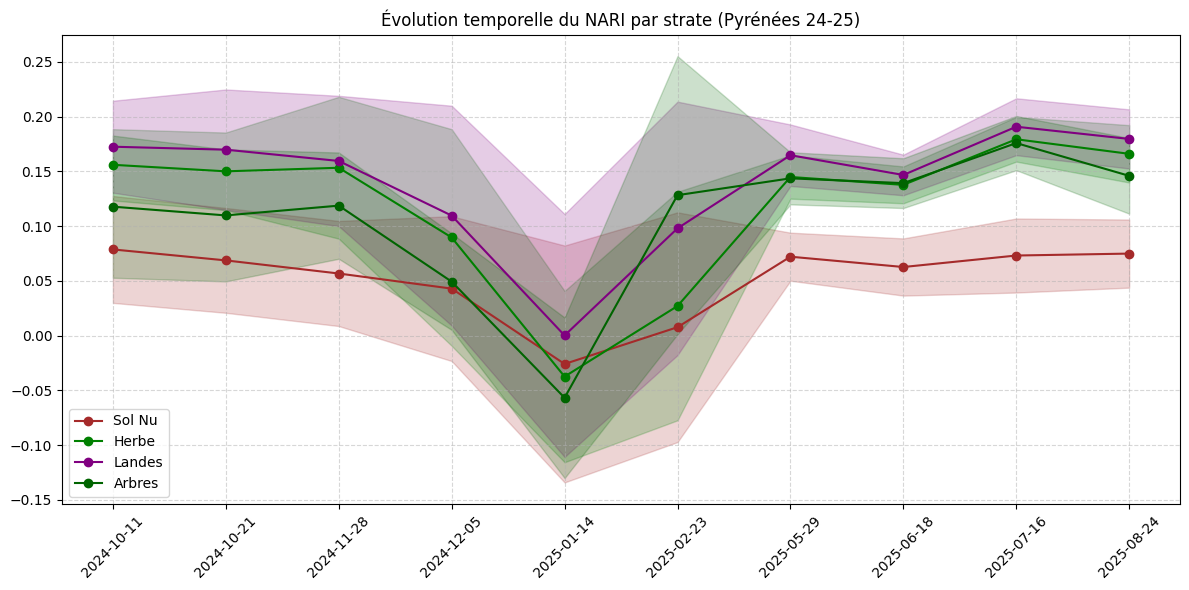

In [4]:
import my_function as mf

# Paramètres
dates_list = ['2024-10-11', '2024-10-21', '2024-11-28', '2024-12-05', '2025-01-14',
              '2025-02-23', '2025-05-29', '2025-06-18', '2025-07-16', '2025-08-24']
data_folder = '/home/onyxia/work/data/projet_eval'
fig_save_path = '/home/onyxia/work/projet_teledec/notebook/results/figure/ARI_series.png'

# Appel de la fonction
mf.process_nari_phenology(data_folder, dates_list, fig_save_path)



In [5]:
import my_function as mf

# Paramètres
base_data = '/home/onyxia/work/data/projet_eval'
nari_output = '/home/onyxia/work/projet_teledec/notebook/results/ARI_serie_temp.tif'

# Exécution
mf.create_nari_raster(base_data, nari_output)

✅ Raster NARI créé : /home/onyxia/work/projet_teledec/notebook/results/ARI_serie_temp.tif


In [6]:
import my_function as mf

# Paramètres
base_dir = '/home/onyxia/work/data/projet_eval'
image_ref = base_dir + '/pyrenees_24-25_B02.tif'
shp_path = base_dir + '/PI_strates_pyrenees_32630.shp'
out_samples = base_dir + '/sample_strata.tif'
bands = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']

# Appel de la fonction
X, Y, groups = mf.prepare_classification_data(base_dir, image_ref, shp_path, out_samples, bands)

✅ Données prêtes : X(209, 100), Y(209,), Groups(209,)


🚀 Lancement de l'optimisation (GridSearch + GroupKFold)...
Fitting 5 folds for each of 120 candidates, totalling 600 fits
✅ Meilleurs paramètres : {'max_depth': None, 'max_features': 'log2', 'min_samples_leaf': 1, 'n_estimators': 150}
✅ Meilleur score F1 : 0.8732

--- RAPPORT DE CLASSIFICATION ---
              precision    recall  f1-score   support

      Sol Nu       1.00      1.00      1.00        28
       Herbe       1.00      1.00      1.00        75
      Landes       1.00      1.00      1.00        80
      Arbres       1.00      1.00      1.00        26

    accuracy                           1.00       209
   macro avg       1.00      1.00      1.00       209
weighted avg       1.00      1.00      1.00       209



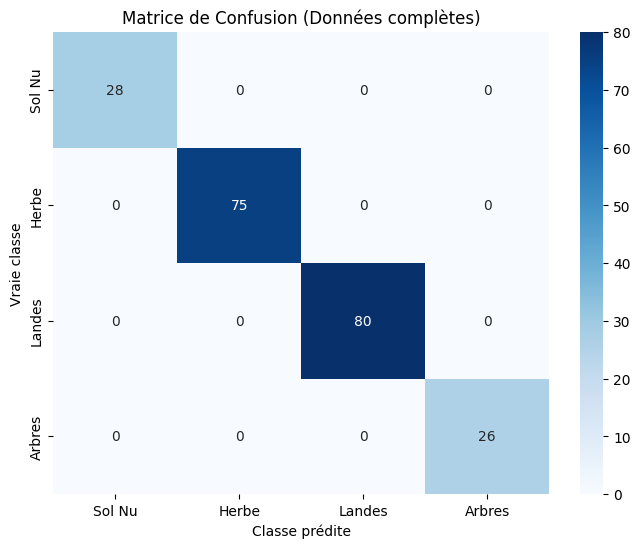

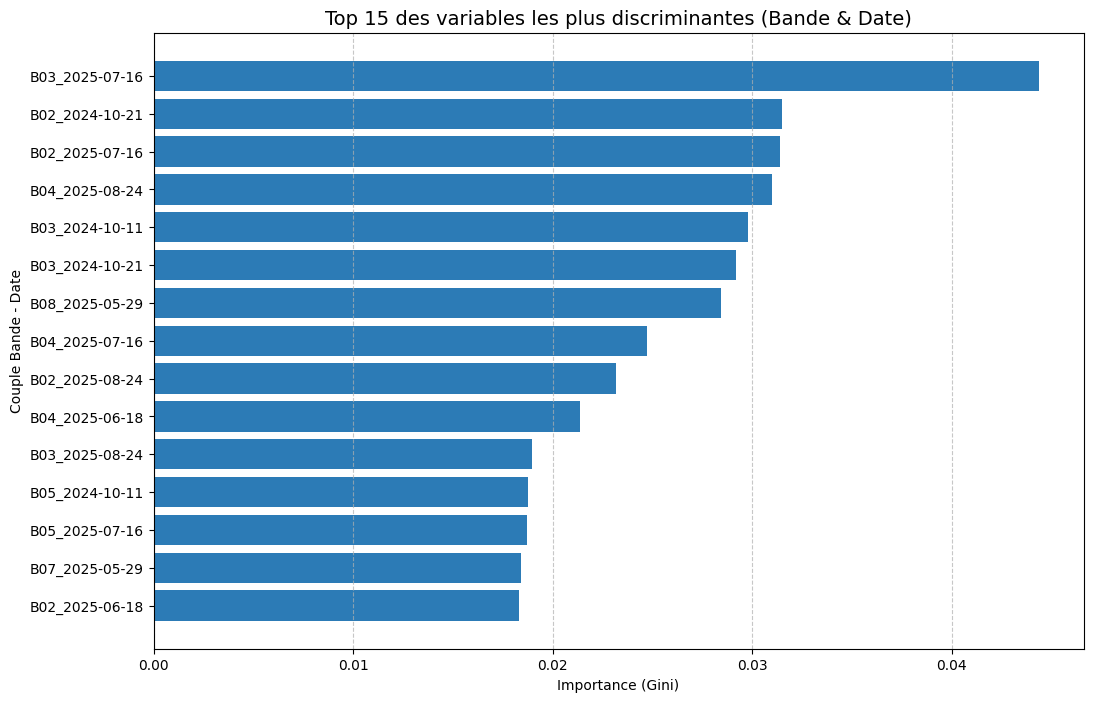


Top des variables pour le rapport :
      Variable  Importance
B03_2025-07-16    0.044377
B02_2024-10-21    0.031485
B02_2025-07-16    0.031403
B04_2025-08-24    0.030990
B03_2024-10-11    0.029765
B03_2024-10-21    0.029205
B08_2025-05-29    0.028416
B04_2025-07-16    0.024715
B02_2025-08-24    0.023184
B04_2025-06-18    0.021380
B03_2025-08-24    0.018959
B05_2024-10-11    0.018754
B05_2025-07-16    0.018733
B07_2025-05-29    0.018432
B02_2025-06-18    0.018301


In [7]:
import my_function as mf
import my_function as mf
import importlib
importlib.reload(mf) # Force la mise à jour du fichier .py

# 1. Optimisation (Peut prendre plusieurs minutes)
best_clf = mf.optimize_random_forest(X, Y, groups)

# 2. Évaluation
mf.evaluate_model(
    model=best_clf, 
    X=X, 
    Y=Y, 
    target_names=['Sol Nu', 'Herbe', 'Landes', 'Arbres'],
    output_fig_path='results/figure/diag_baton_conf_mat.png'
)
# Listes exactes utilisées pour la matrice X
bandes = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
dates_reelles = ['2024-10-11', '2024-10-21', '2024-11-28', '2024-12-05', '2025-01-14',
                 '2025-02-23', '2025-05-29', '2025-06-18', '2025-07-16', '2025-08-24']

# Appel de la fonction
mf.plot_feature_importance_dates(
    model=best_clf, 
    band_names=bandes, 
    dates=dates_reelles, 
    output_path='results/figure/feature_importance_dates.png'
)

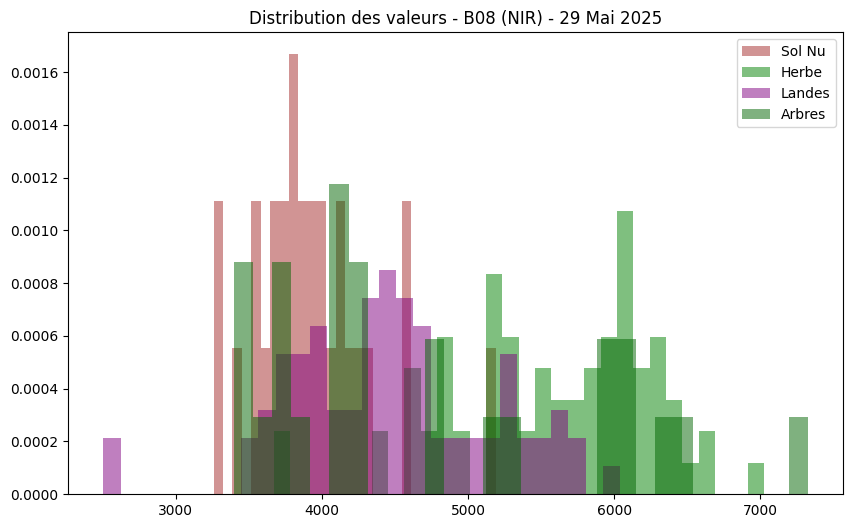

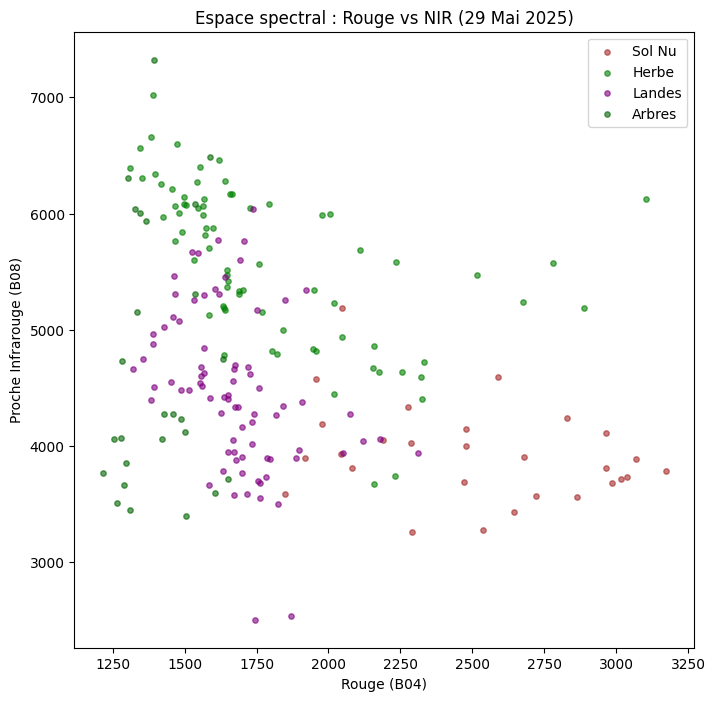

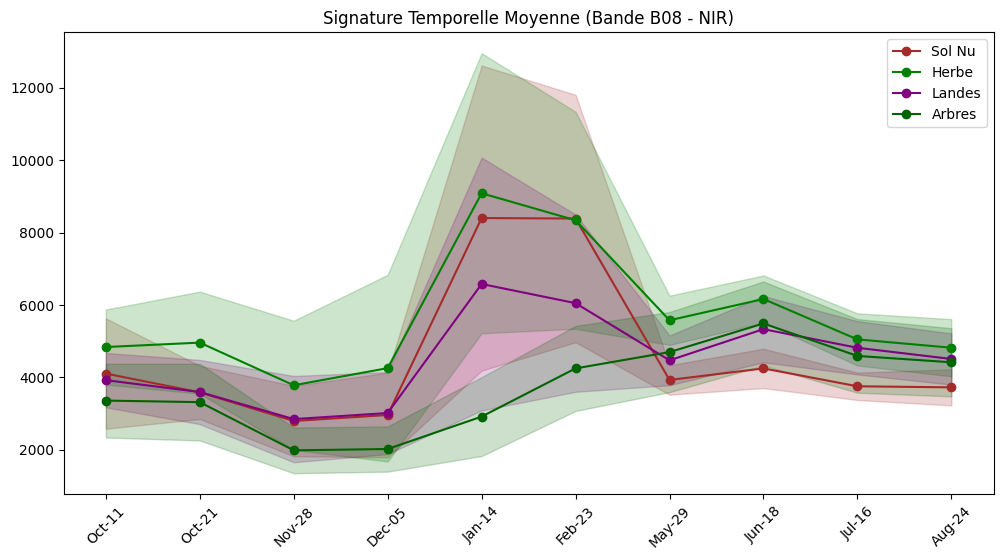

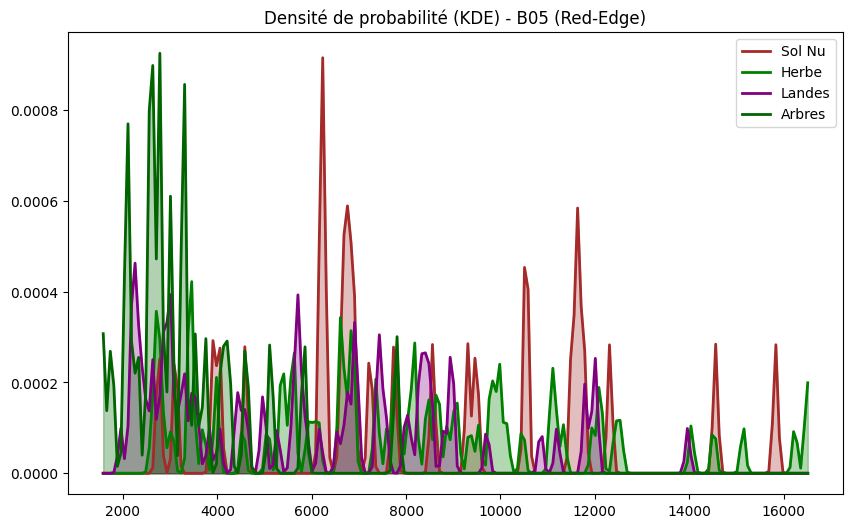

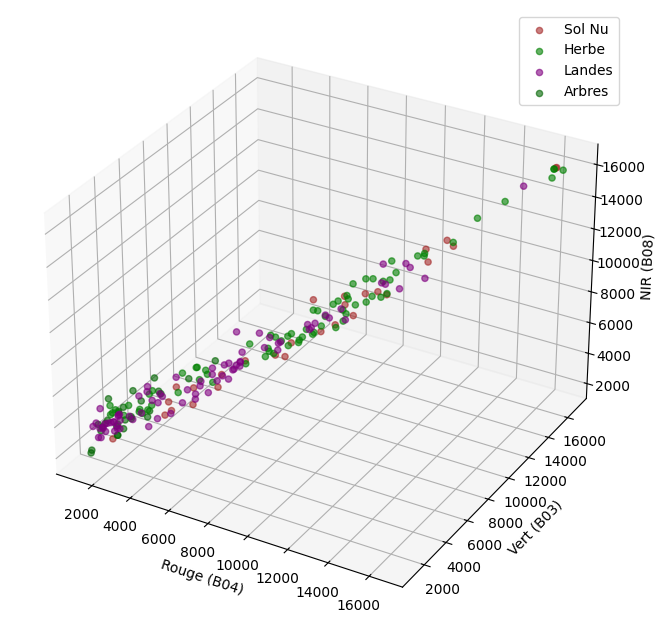

In [8]:
import my_function as mf

# On définit le dossier où enregistrer les images
results_fig_dir = 'results/figure'

# Appel de la fonction globale d'analyse
mf.plot_data_analysis(X, Y, results_fig_dir)

In [9]:
import my_function as mf

# Paramètres
base_dir = '/home/onyxia/work/data/projet_eval'
bandes = ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12']
out_path = '/home/onyxia/work/projet_teledec/notebook/results/carte_strates.tif'

# Production de la carte avec le meilleur modèle trouvé par GridSearch
mf.produce_final_map(best_clf, base_dir, bandes, out_path)

--- Production de la Carte Finale ---
Dimensions : 2103 x 1655


Données prêtes : (3480465, 100)
Lancement de la prédiction...
✅ Carte terminée et sauvegardée dans : /home/onyxia/work/projet_teledec/notebook/results/carte_strates.tif
